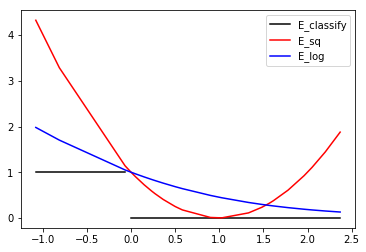

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def test_h(w, x):
    return np.sign(w @ x)

#set dimension to 2, sample size to 20, range to [-10, 10]
num_dimensions = 2
num_samples = 40
training_range = 2

#create training set x
x_training = np.zeros((num_dimensions+1,num_samples))
x_training[0] = np.ones(num_samples)
for i in range(1, num_dimensions + 1):
    l = np.random.uniform(-training_range, training_range, num_samples)
    x_training[i] = l

#create target and initial norm of the decision boundary
w_target = np.array([5, 6, 2])
w_initial = np.array([1, 1, 2])

#create training set y
y_training = test_h(w_target, x_training)

#make the dataset non-linearly separable
for i in range(len(y_training)):
    if random.random()<0.3:
        y_training[i] = -1 * y_training[i]

#plot points on the graph. If y > 0, the point is red. Otherwise, the point is blue
x_coordinates = x_training[1, :]
y_coordinates = x_training[2, :]
colors = ["r" if y > 0 else "b" for y in y_training]
#plt.scatter(x_coordinates, y_coordinates, c = colors)

#pocket learning algorithm
max_iteration = 30

#return the number of misclassified points
def num_mis(w, x, y):
    misses = 0
    s = np.sign(w@x)
    for i in range(len(y)):
        if (s[i]!=y[i]):
            misses += 1
    return misses
            
def pocket_algo(w_initial, x_training, y_training):
    misclassified = True
    iteration = 0
    best_w = w_initial
    least_misses = num_mis(w_initial, x_training, y_training)
    
    while(misclassified):
        if (iteration > max_iteration):
            return best_w;
        y = test_h(best_w, x_training)
        #determining whether there is a misclassified point
        correct = y == y_training
        
        #if there is no misclassified point, return w
        if np.all(correct):
            misclassified = False
            return best_w 
        else:
            #find a misclassified point and update w
            misslist = []
            for x in range(len(~correct)):
                if (~correct[x] == True):
                    misslist.append(x)
            i = random.choice(misslist)
            update_w = best_w + y_training[i]*x_training[:,i]
            if(num_mis(update_w, x_training, y_training)<least_misses):
                best_w = update_w
                least_misses = num_mis(update_w, x_training, y_training)
                
        iteration += 1

        
best_w = pocket_algo(w_initial, x_training, y_training)
s = best_w @ x_training

s_cla = []
s_cla1 = []
s_0 = []
s_1 = []
s_sq = []
s_log = []
s_plot = []

for i in range(len(y_training)):
    if y_training[i] == 1:
        s_plot.append(s[i])
    
s_p = sorted(s_plot)
for i in range(len(s_plot)):
    if (s_p[i]>0):
        s_cla.append(0)
        s_0.append(s_p[i])
    else:
        s_cla1.append(1)
        s_1.append(s_p[i])
    s_sq.append((s_p[i]-1)**2)
    s_log.append(math.log(1+math.exp(-s_p[i]),2))

plt.plot(s_0, s_cla, "k", label = 'E_classify')
plt.plot(s_1, s_cla1, "k")
plt.plot(s_p, s_sq, 'r', label = 'E_sq')
plt.plot(s_p, s_log, 'b', label = 'E_log')
plt.legend()
plt.show()

